In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # for Visualizing data
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("Diwali Sales Data.csv",encoding = "unicode_escape")
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
# drop unrelated/ blanks columns
df.drop(["Status","unnamed1"],axis =1 ,inplace = True)

In [7]:
# check for null value
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
#drop null value
df.dropna(inplace=True)

In [9]:
# check for null value
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [10]:
df['Amount'] = df['Amount'].astype('int')

In [11]:
df['Amount'].dtype

dtype('int32')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Exploratory Data Analysis


### Gender

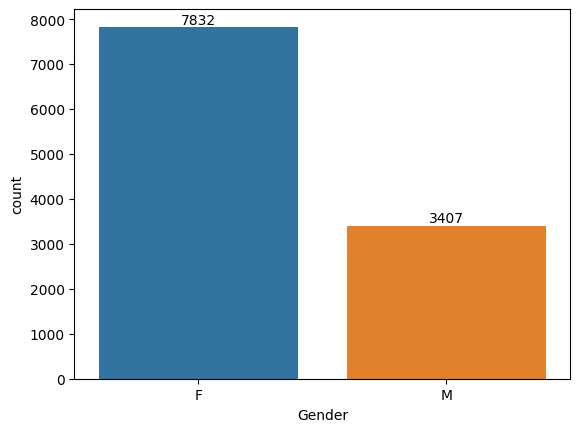

In [13]:
ax = sns.countplot(x='Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

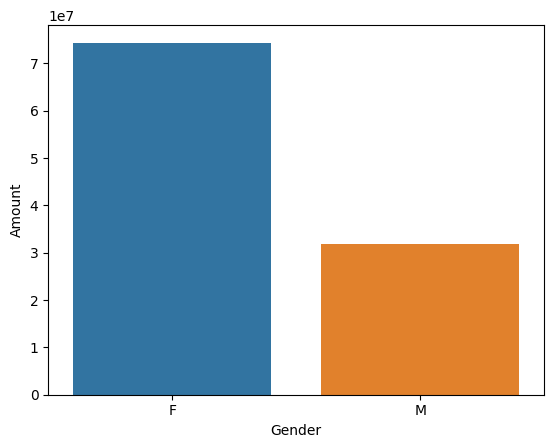

In [14]:
sales_gen = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

#### From above graph we can see that most of the buyers are female and even the purchasing power of females are greater than men 

## Age

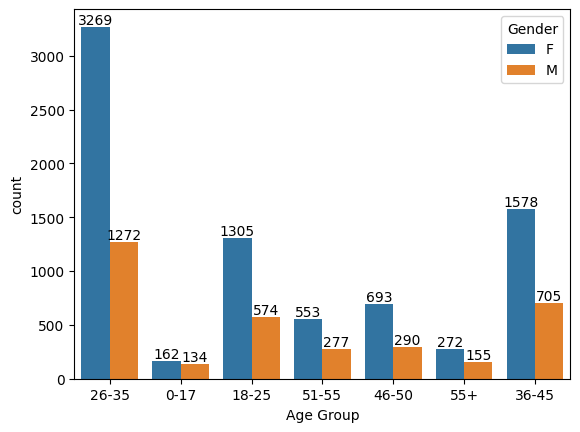

In [15]:
ax= sns.countplot(data= df, x ='Age Group',hue = "Gender")
for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Age Group', ylabel='Amount'>

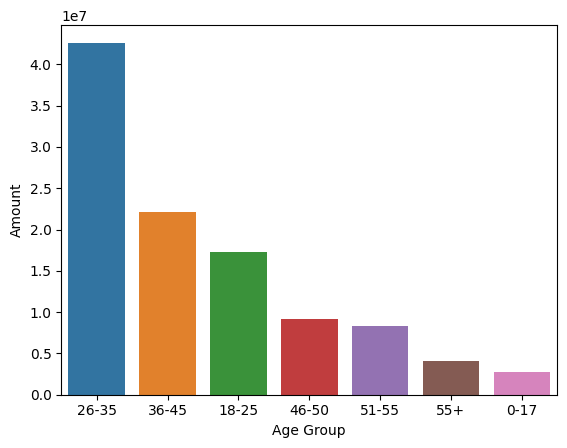

In [16]:
sales_age = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)

### For above graph we can see that most of the buyers are of age group between 26-35 yrs female

## State

<Axes: xlabel='State', ylabel='Orders'>

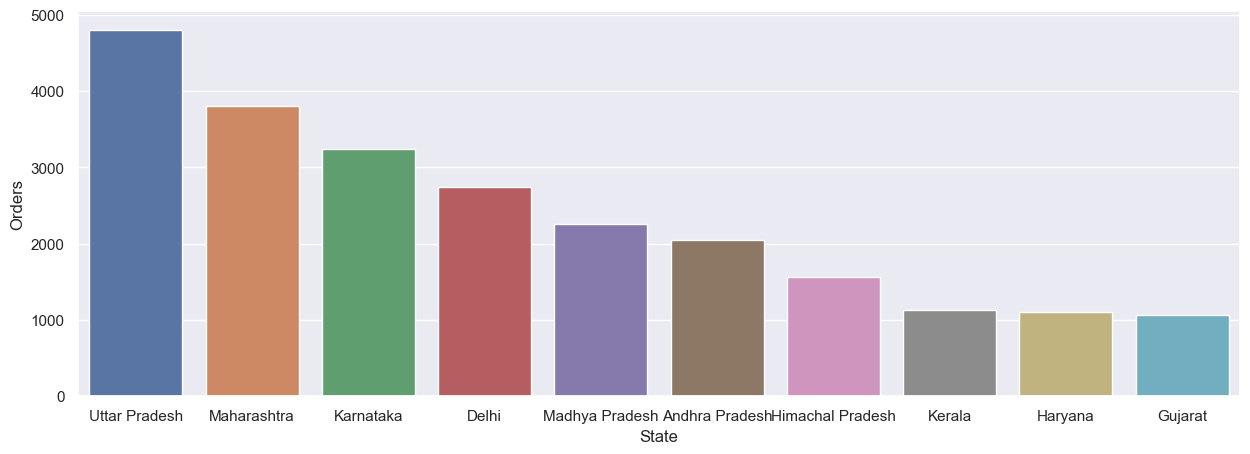

In [17]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

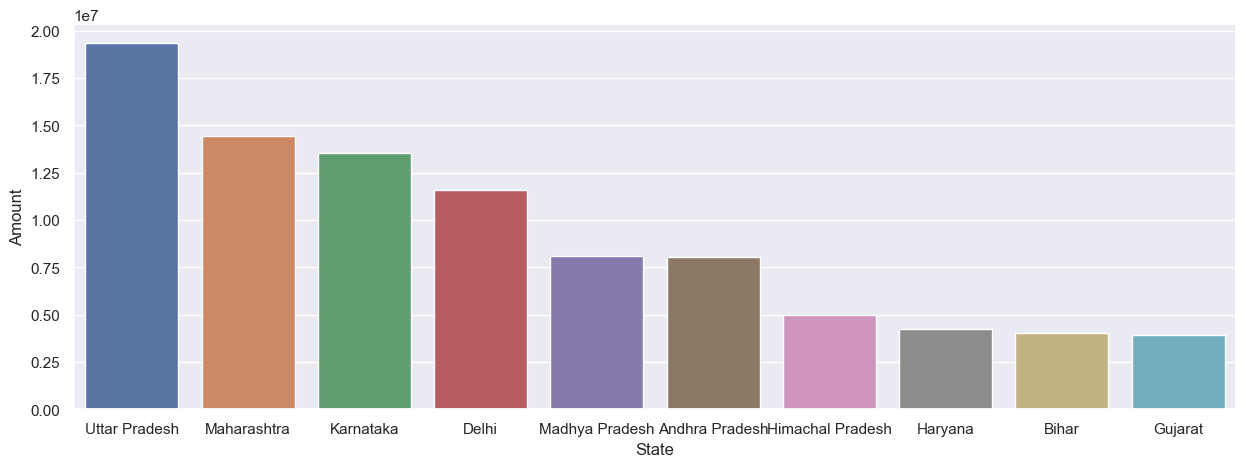

In [18]:
# total amount/size from top 10 states

sales_state = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y='Amount')

### From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharastra and Karnataka respectively

## Marital Status

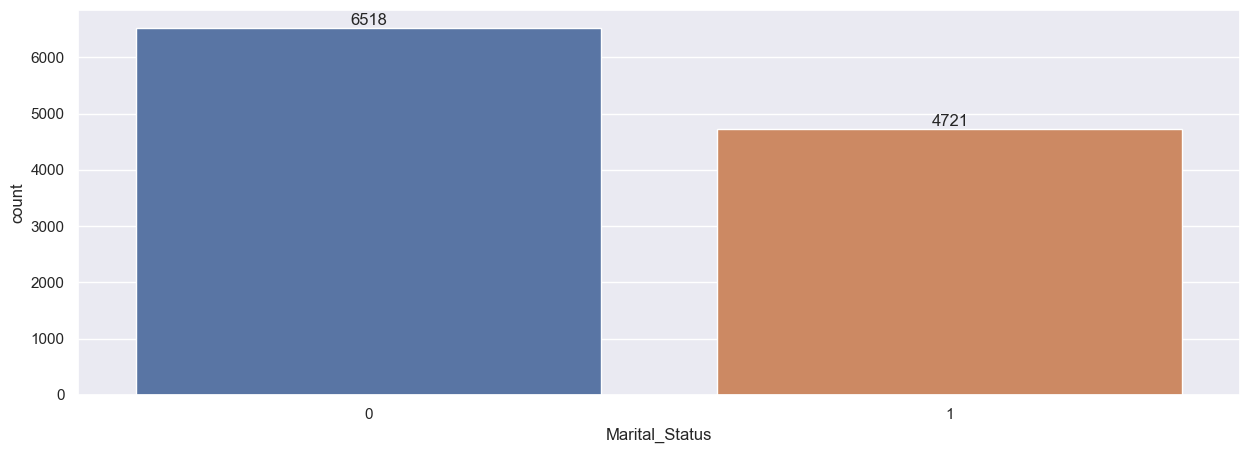

In [19]:
ax= sns.countplot(data= df, x ='Marital_Status')
sns.set(rc={'figure.figsize':(7,5)})

for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

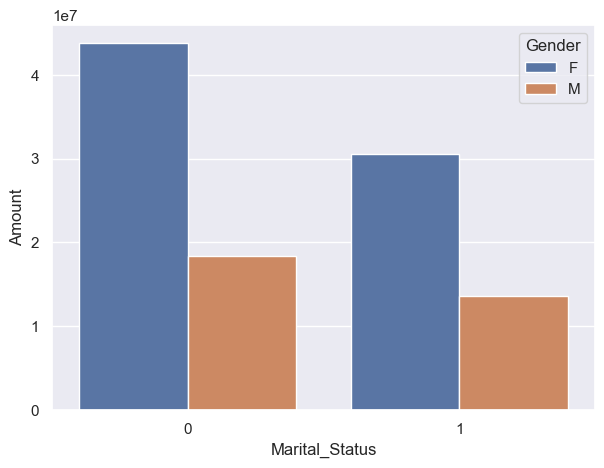

In [20]:
sales_state = df.groupby(['Marital_Status','Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y='Amount',hue = 'Gender')

### From above graphs we can see that most of the buyers are married(women) and they have high purchasing power

## Occupation

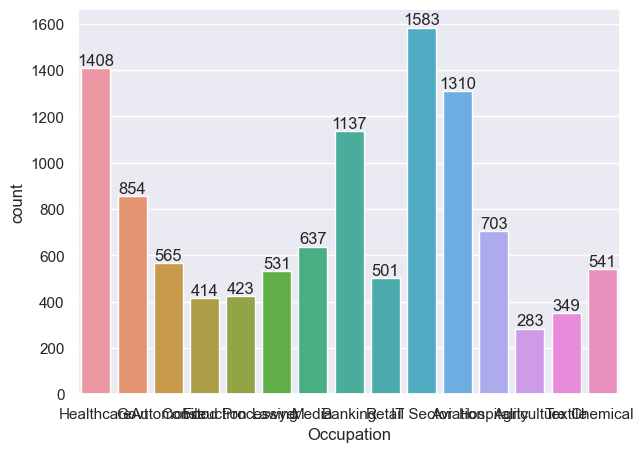

In [21]:
ax= sns.countplot(data= df, x ='Occupation')
sns.set(rc={'figure.figsize':(20,5)})

for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Occupation', ylabel='Amount'>

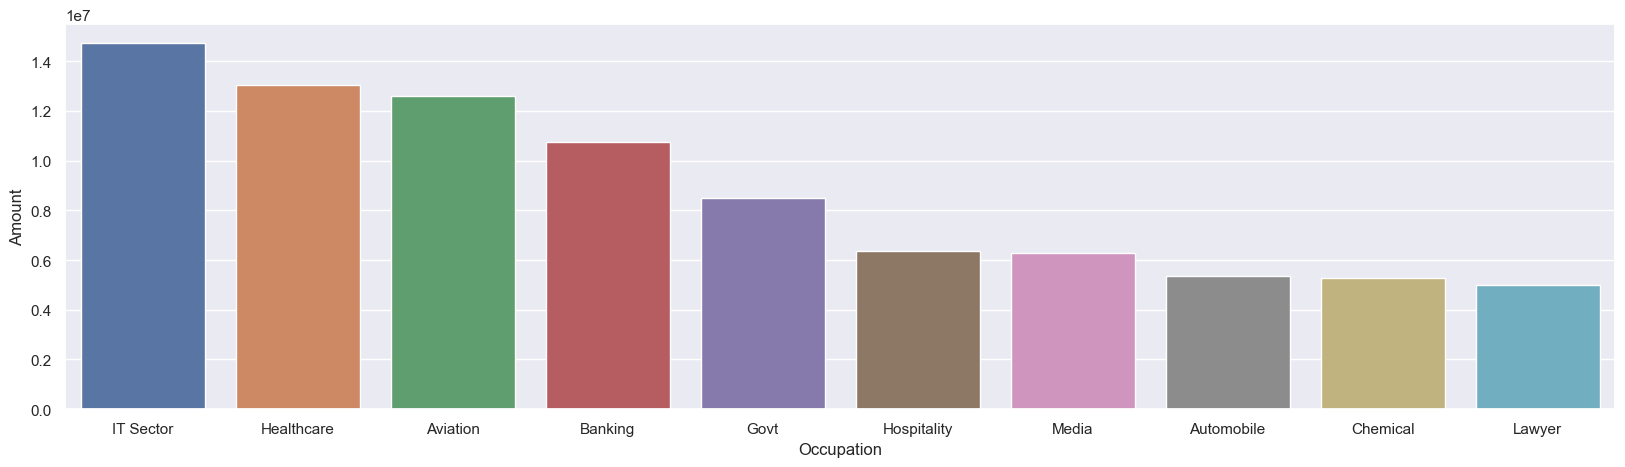

In [22]:
sales_state = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y='Amount')

### From above graphs we can see that most of the buyers are working in IT, Aviation and Healthcare Sector

## Product Category

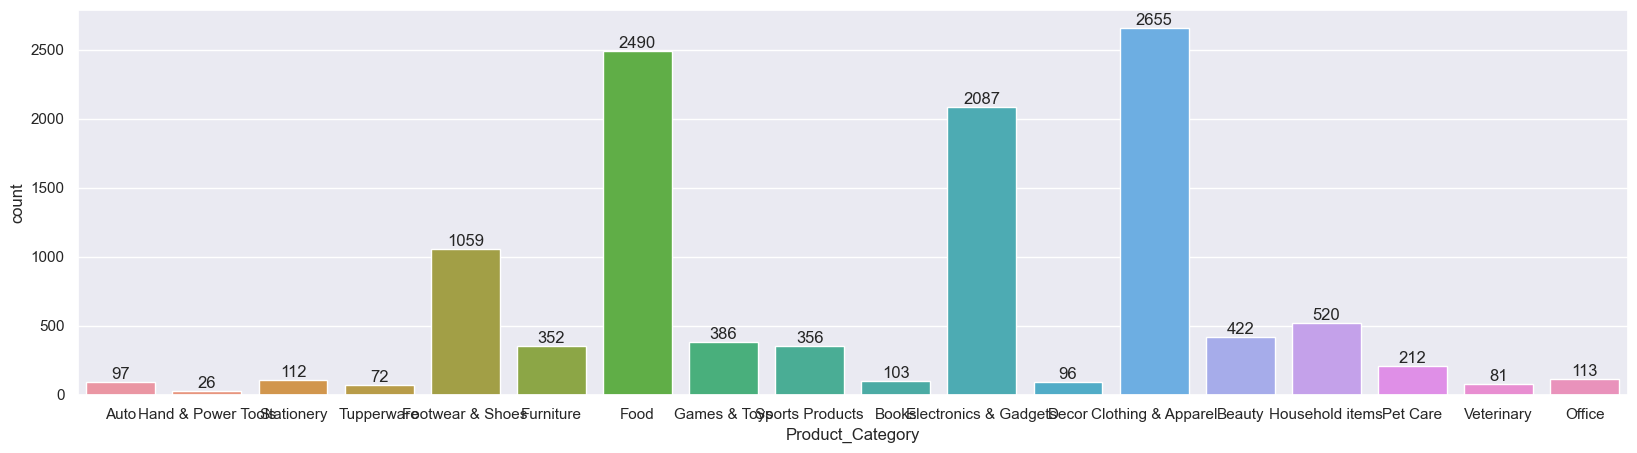

In [23]:
ax= sns.countplot(data= df, x ='Product_Category')
sns.set(rc={'figure.figsize':(20,5)})

for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Product_Category', ylabel='Amount'>

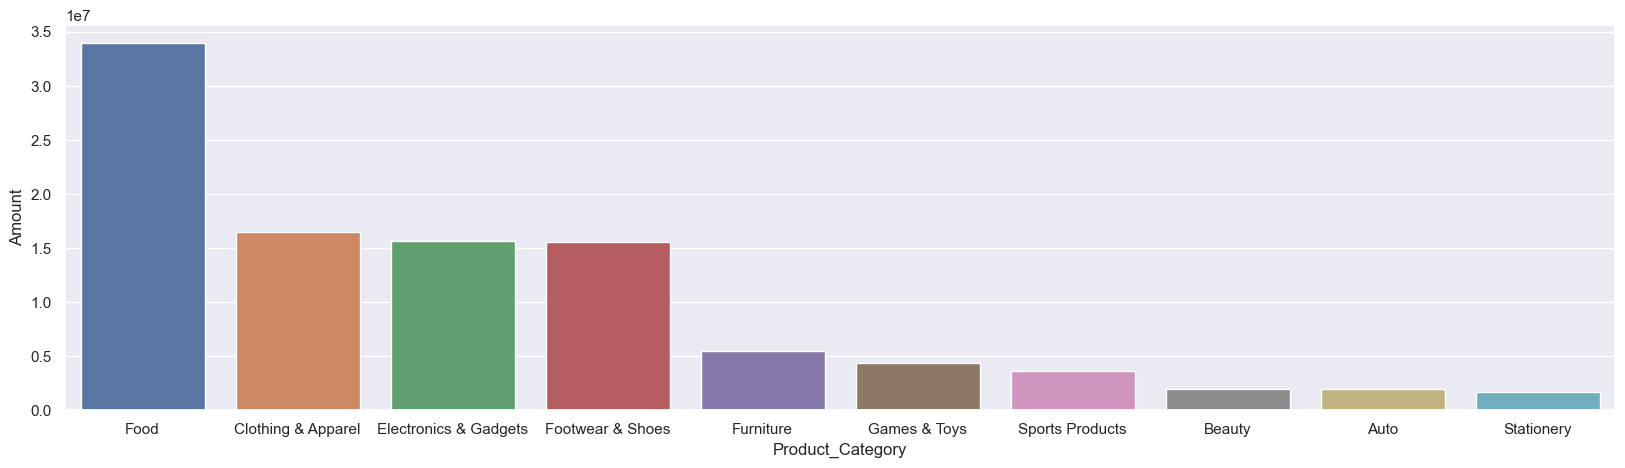

In [24]:
sales_state = df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y='Amount')

### From above graphs we can see that most of the sold products are from food, footwear and Electronics category

<Axes: xlabel='Product_ID', ylabel='Orders'>

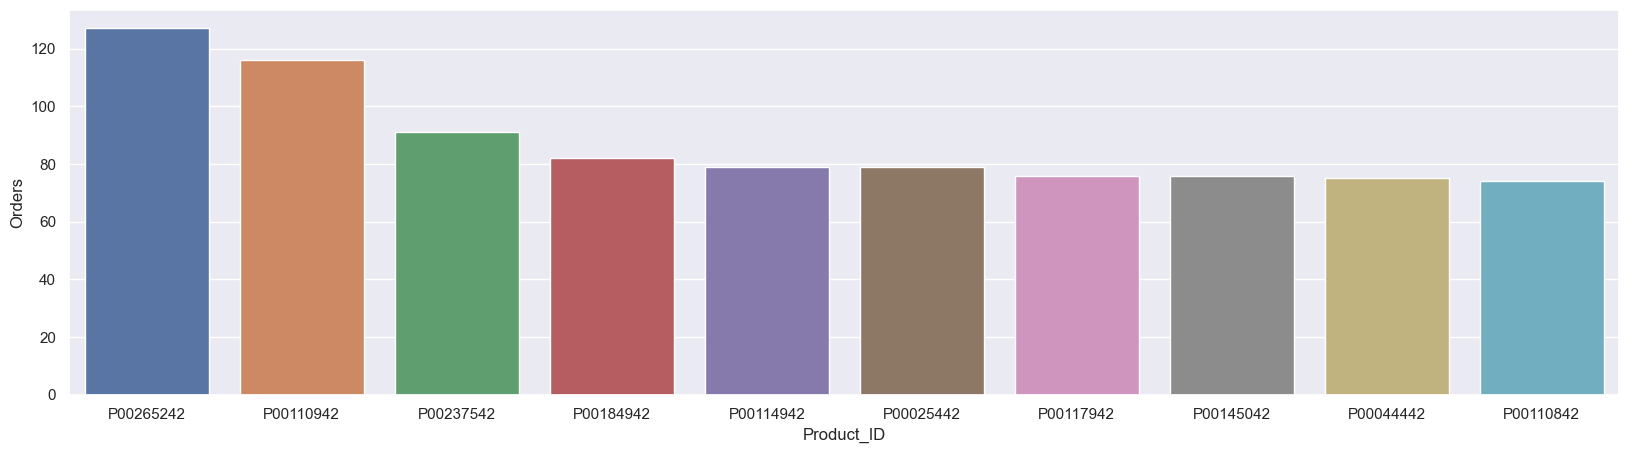

In [25]:
sales_state = df.groupby(['Product_ID'],as_index = False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y='Orders')

<Axes: xlabel='Product_ID'>

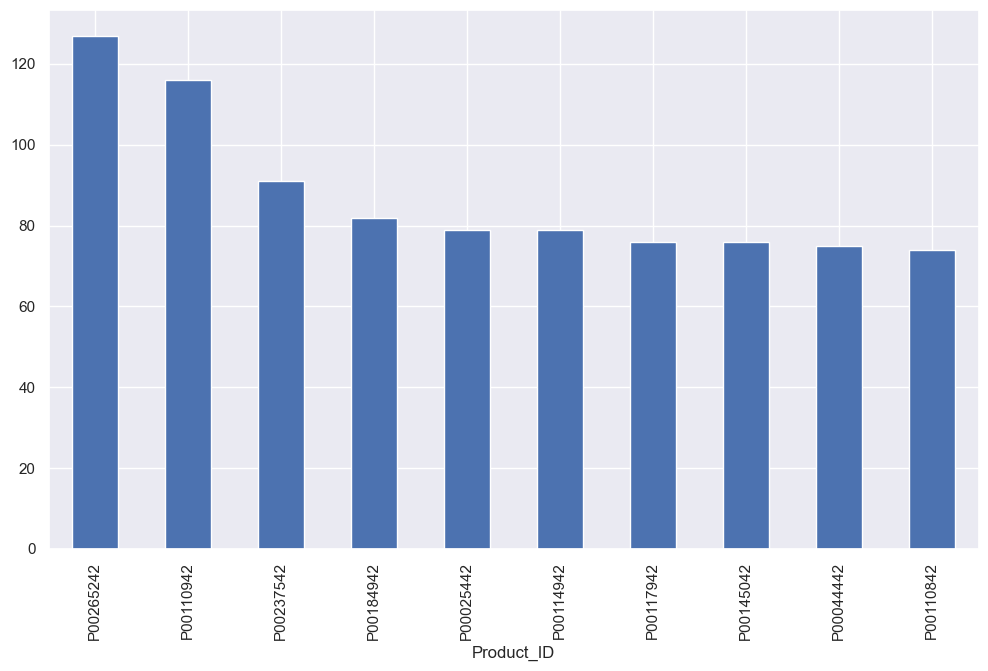

In [26]:
# top 10 most sold products 

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind = 'bar')

## Conclusion

### *Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*